In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ast import literal_eval
from tabulate import tabulate 
from matplotlib import pyplot as plt

In [15]:
def analyse_logs(filename= '2022-03-31-14-28-28_safety_policy_log_sigmax0.csv', sigmax = 1, filter_transient_ndays = 20, msl2invcost_ratio = 1 ):
    '''
    input: csv file name generated from the main.py --log-iterations for local policies or exported brain
    input: filter_transient_ndays: remove first n days of the episode that show transient response
    '''
    missed_cost = [0.15, 0.1, 0.05] 
    inventory_cost = [msc/msl2invcost_ratio for msc in missed_cost]
    df = pd.read_csv(filename)
    df = df[df["iteration"]>20]
    df = df[df["self.sigmax"]==sigmax]
    df.inventory = df.inventory.apply(literal_eval)
    df.lost_sales = df.lost_sales.apply(literal_eval)
    loss_mean = np.mean(df["lost_sales"].values.tolist())
    loss_std = np.std(df["lost_sales"].values.tolist())
    inv_mean = np.mean(df["inventory"].values.tolist())
    inv_std = np.std(df["inventory"].values.tolist())
    df[["inv0", "inv1", "inv2", "inv3"]] =df["inventory"].apply(pd.Series)
    df['invs'] = df["inventory"].apply(lambda x: sum(x))
    df[["ls0", "ls1", "ls2", "ls3"]] = df["lost_sales"].apply(pd.Series)
    df['lss'] = df["lost_sales"].apply(lambda x: sum(x))
    df['costs'] = df['inv0']*inventory_cost[0] + df['ls0']*missed_cost[0]\
                + df['inv1']*inventory_cost[1] + df['ls1']*missed_cost[1]\
                + df['inv2']*inventory_cost[2] + df['ls2']*missed_cost[2]\
#     df["cost0"] = df["inv0"]*inventory_cost + df["ls0"]*missed_cost
#     df["cost1"] = df["inv1"]*inventory_cost + df["ls1"]*missed_cost
#     df["cost2"] = df["inv2"]*inventory_cost + df["ls2"]*missed_cost
    invs_mean_annual = df.groupby('episode').sum().invs.mean()
    invs_std_annual = df.groupby('episode').sum().invs.std()
    lss_mean_annual = df.groupby('episode').sum().lss.mean()
    lss_std_annual = df.groupby('episode').sum().lss.std()  
    costs_mean_annual =  df.groupby('episode').sum().costs.mean()
    costs_std_annual = df.groupby('episode').sum().costs.std()
    return lss_mean_annual, lss_std_annual, invs_mean_annual, invs_std_annual, costs_mean_annual, costs_std_annual
    

In [7]:
#ddf = pd.read_csv('2022-04-17-19-54-03_safety_policy_log_sigmax_brain_sweep.csv')

In [6]:
# ddf.inventory = ddf.inventory.apply(literal_eval)
# ddf.lost_sales = ddf.lost_sales.apply(literal_eval)
#ddf.inventory
# ddf['invs'] = ddf["inventory"].apply(lambda x: sum(x), axis = 0 )
# ddf.invs

In [8]:
#  ddf['invs'] = ddf["inventory"].apply(lambda x: sum(x))
# ddf.invs

In [16]:
import os
os.listdir()

['.ipynb_checkpoints',
 '2022-03-31-14-28-28_safety_policy_log_sigmax0.csv',
 '2022-03-31-14-47-39_safety_policy_log_sigmax8.csv',
 '2022-03-31-15-11-21_safety_policy_log_sigmax8_mip_plus_heurisitcs.csv',
 '2022-04-01-09-55-21_safety_policy_log_mip_only_sigmax5.csv',
 '2022-04-01-15-28-04_exported_log_ims_safety_mip_mbr_v23_sigma5.csv',
 '2022-04-02-11-16-32_exported_log_ims_mbr_RLonly_v5_sigmax5.csv',
 '2022-04-03-17-00-07_quasi_static_dfo_policy_log.csv',
 '2022-04-03-17-02-10_quasi_static_dfo_policy_log.csv',
 '2022-04-03-17-03-43_quasi_static_dfo_policy_log_update10d.csv',
 '2022-04-11-09-40-23_exported_log_ims_safety_mip_mbr38_ratio1.csv',
 '2022-04-11-10-28-43_exported_log_ims_safety_mip_mbr37_ratio3.csv',
 '2022-04-11-11-06-50_exported_log_ims_safety_mbr39_ratio15.csv',
 '2022-04-11-12-23-11_exported_log_ims_safety_mbr40_ratio10.csv',
 '2022-04-11-12-59-45_exported_log_ims_safety_mbr41_ratio7.csv',
 '2022-04-11-17-31-21_safety_policy_log_mixed_cost_ratio1.csv',
 '2022-04-12-09-1

In [6]:
# build a dataframe to store the data
#filename, type (brain plus mip vs mip), ratio, ls0_mean_annual, ls0_std_annual, inv0_mean_annual, inv0_std_annual, cost0_mean_annual, cost0_std_annual
df = pd.DataFrame(columns = ['filename', 'sigmax', 'cost ratio', 'lss_mean_annual', 'lss_std_annual', 'invs_mean_annual', 'invs_std_annual', 'costs_mean_annual', 'costs_std_annual'])

In [7]:
filename1 = '2022-05-04-15-39-59_exported_log_r100freq10.csv'
filename2 = '2022-05-04-11-38-48_safety_policy_log_mixedr100freq10.csv'
cost_ratio = 100
input_info = {
  1:[filename1, 1, cost_ratio, 'brain+mip'],
  2:[filename1, 2, cost_ratio, 'brain+mip'],
  3:[filename1, 3, cost_ratio,'brain+mip'],
  4:[filename1, 4, cost_ratio,'brain+mip'],
  5:[filename1, 5, cost_ratio,'brain+mip'],
  6:[filename1, 6, cost_ratio,'brain+mip'],
  7:[filename1, 7, cost_ratio,'brain+mip'],
  8:[filename1, 8, cost_ratio,'brain+mip'],
  9:[filename1, 9, cost_ratio,'brain+mip'],
 10:[filename1, 10, cost_ratio,'brain+mip'],
 11:[filename1, 11, cost_ratio,'brain+mip'],  
 12:[filename2, 1, cost_ratio, 'mip mix'],
 13:[filename2, 2, cost_ratio, 'mip mix'],
 14:[filename2, 3, cost_ratio, 'mip mix'],
 15:[filename2, 4, cost_ratio, 'mip mix'],
 16:[filename2, 5, cost_ratio, 'mip mix'],
 17:[filename2, 6, cost_ratio, 'mip mix'],
 18:[filename2, 7, cost_ratio, 'mip mix'],
 19:[filename2, 8, cost_ratio, 'mip mix'],
 20:[filename2, 9, cost_ratio, 'mip mix'],
 21:[filename2, 10, cost_ratio, 'mip mix'],
 22:[filename2, 11, cost_ratio, 'mip mix'],    
}

In [8]:
for input in input_info.keys():
    print(input_info[input][0], '\n')
    temp_dict = {}
    temp_dict['filename'] = input_info[input][0]
    temp_dict['sigmax'] = input_info[input][1]
    temp_dict['cost ratio'] = input_info[input][2] 
    temp_dict['solver'] = input_info[input][3]
    results = analyse_logs(filename = temp_dict['filename'], sigmax = temp_dict['sigmax'], filter_transient_ndays = 20, msl2invcost_ratio = temp_dict['cost ratio'])
    temp_dict['lss_mean_annual'] = results[0] 
    temp_dict['lss_std_annual'] = results[1] 
    temp_dict['invs_mean_annual'] = results[2] 
    temp_dict['invs_std_annual'] = results[3] 
    temp_dict['costs_mean_annual'] = results[4] 
    temp_dict['costs_std_annual'] = results[5] 
    print(temp_dict)
    df = df.append(temp_dict, ignore_index = True)
    

2022-05-04-15-39-59_exported_log_r100freq10.csv 

{'filename': '2022-05-04-15-39-59_exported_log_r100freq10.csv', 'sigmax': 1, 'cost ratio': 100, 'solver': 'brain+mip', 'lss_mean_annual': 0.0, 'lss_std_annual': 0.0, 'invs_mean_annual': 1691.2666666666667, 'invs_std_annual': 57.519520496047576, 'costs_mean_annual': 1.3343333333333336, 'costs_std_annual': 0.06028938151788858}
2022-05-04-15-39-59_exported_log_r100freq10.csv 

{'filename': '2022-05-04-15-39-59_exported_log_r100freq10.csv', 'sigmax': 2, 'cost ratio': 100, 'solver': 'brain+mip', 'lss_mean_annual': 1.3571428571428572, 'lss_std_annual': 1.6458405781822274, 'invs_mean_annual': 2279.4285714285716, 'invs_std_annual': 90.1440849083069, 'costs_mean_annual': 2.2264642857142856, 'costs_std_annual': 0.23634789093505904}
2022-05-04-15-39-59_exported_log_r100freq10.csv 

{'filename': '2022-05-04-15-39-59_exported_log_r100freq10.csv', 'sigmax': 3, 'cost ratio': 100, 'solver': 'brain+mip', 'lss_mean_annual': 6.590909090909091, 'lss_std_an

{'filename': '2022-05-04-11-38-48_safety_policy_log_mixedr100freq10.csv', 'sigmax': 11, 'cost ratio': 100, 'solver': 'mip mix', 'lss_mean_annual': 320.6842105263158, 'lss_std_annual': 30.486887220535664, 'invs_mean_annual': 2939.1052631578946, 'invs_std_annual': 406.9412863378644, 'costs_mean_annual': 50.808052631578946, 'costs_std_annual': 4.58147054234875}


In [9]:
# print(input_info[input][0])
# df = pd.read_csv(input_info[input][0])

In [20]:
# df.lost_sales

0                [0, 0, 0, 0]
1        [0.0, 0.0, 0.0, 0.0]
2       [15.0, 0.0, 0.0, 0.0]
3        [4.0, 0.0, 0.0, 0.0]
4       [16.0, 0.0, 0.0, 0.0]
                ...          
1204     [0.0, 0.0, 0.0, 0.0]
1205     [0.0, 0.0, 0.0, 0.0]
1206             [0, 0, 0, 0]
1207     [0.0, 0.0, 0.0, 0.0]
1208     [9.0, 0.0, 0.0, 0.0]
Name: lost_sales, Length: 1209, dtype: object

In [10]:
df_brain = df[df['solver']=='brain+mip']
df_mipmix = df[df['solver']=='mip mix']
#df_mip = df[df['solver'] =='mip']

In [64]:
df_brain.columns

Index(['state_list', 'sim_reward', 'sim_terminal', 'episode_demand_profile',
       'demand_list', 'demand_actual', 'demand_forecast', 'demand_sigma',
       'inventory', 'units_sold', 'units_replenished', 'lost_sales',
       'previous_order_levels', 'brain_action_previous',
       'contraint_relaxation_flag', 'anticipated_missed_sale_L0',
       'anticipated_missed_sale_L1', 'anticipated_missed_sale_L2',
       'anticipated_inventory_L0', 'anticipated_inventory_L1',
       'anticipated_inventory_L2', 'self.iter_count',
       'missed2holding_cost_ratio', 'self.sigmax', 'reward_pnl',
       'demand_distribution_profile', 'sigmax', 'offset', 'amp1', 'ph1',
       'amp2', 'ph2', 'randvar', 'initial_inventory_low',
       'initial_inventory_high', 'initial_inventory', 'lead_profile', 'solver',
       'filter_alpha', 'missed_sale_to_inventory_cost_ratio',
       'action_frequency', 'episode', 'iteration', 'TimeStamp',
       'safety_stock_stage0', 'safety_stock_stage1', 'safety_stock_stag

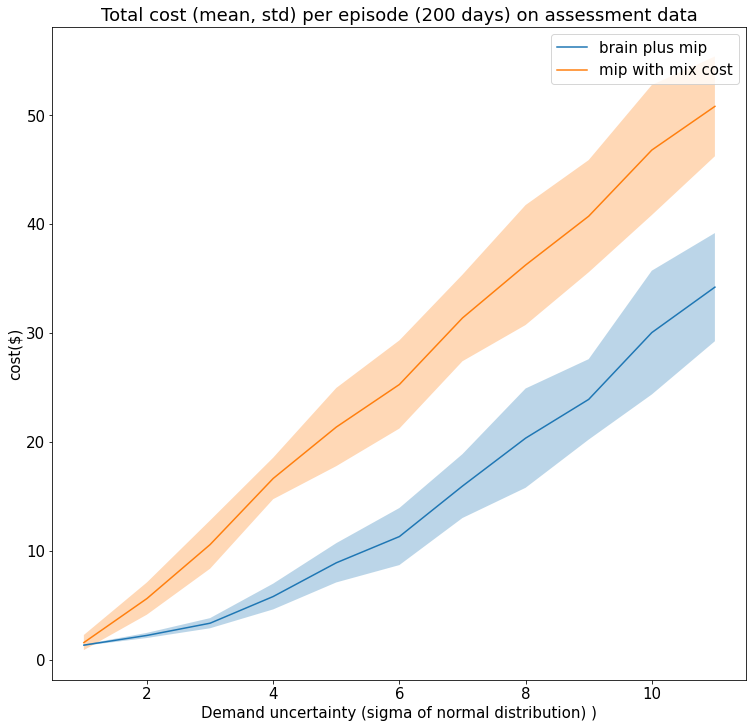

In [19]:
plt.rc('font', size=15)
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
mean_cost = df_brain.costs_mean_annual
std_cost = df_brain.costs_std_annual
sigmax = df_brain["sigmax"]
#print(sigmax)
#np.arange(len(mean_cost))
ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost, 
                alpha=0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='brain plus mip')
ax0.set_ylabel('cost($)',fontsize=15)
ax0.set_xlabel('Demand uncertainty (sigma of normal distribution) )', fontsize=15)
ax0.set_title('Total cost (mean, std) per episode (200 days) on assessment data', fontsize=18)
ax0.legend()


mean_cost = df_mipmix.costs_mean_annual
std_cost = df_mipmix.costs_std_annual
sigmax = df_mipmix["sigmax"]

ax0.fill_between(sigmax.tolist(), 
                 mean_cost - std_cost, 
                 mean_cost + std_cost,
                alpha = 0.3)
ax0.plot(sigmax.tolist(), mean_cost, label='mip with mix cost')
ax0.legend()


# mean_cost = df_mip.costs_mean_annual
# std_cost = df_mip.costs_std_annual
# sigmax = df_mip["sigmax"]

# ax0.fill_between(sigmax.tolist(), 
#                  mean_cost - std_cost, 
#                  mean_cost + std_cost, 
#                  label='Standard Deviation mip with inv cost', alpha=0.3)
# ax0.plot(sigmax.tolist(), mean_cost, label='Mean cost mip with inv cost')
# ax0.legend()


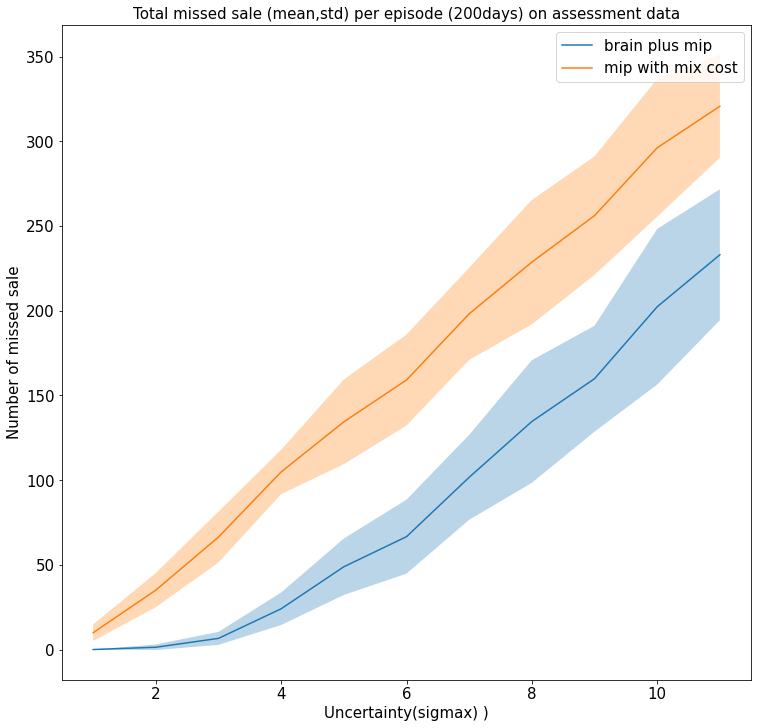

In [28]:
plt.rc('font', size=15)
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
mean_missed = df_brain.lss_mean_annual
std_missed = df_brain.lss_std_annual
sigmax = df_brain["sigmax"]
#np.arange(len(mean_cost))
ax0.fill_between(sigmax.tolist(), 
                 mean_missed - std_missed, 
                 mean_missed + std_missed, 
                 alpha=0.3)
ax0.plot(sigmax.tolist(), mean_missed, label='brain plus mip')
ax0.set_ylabel('Number of missed sale',fontsize=15)
ax0.set_xlabel('Uncertainty(sigmax) )', fontsize=15)
ax0.set_title('Total missed sale (mean,std) per episode (200days) on assessment data', fontsize=15)
ax0.legend()


mean_missed = df_mipmix.lss_mean_annual
std_missed = df_mipmix.lss_std_annual
sigmax = df_mipmix["sigmax"]
ax0.fill_between(sigmax.tolist(), 
                 mean_missed - std_missed, 
                 mean_missed + std_missed, 
                 alpha=0.3)
ax0.plot(sigmax.tolist(), mean_missed, label='mip with mix cost')
ax0.legend()

# mean_missed = df_mip.lss_mean_annual
# std_missed = df_mip.lss_std_annual
# sigmax = df_mip["sigmax"]
# ax0.fill_between(sigmax.tolist(), 
#                  mean_missed - std_missed, 
#                  mean_missed + std_missed, 
#                  label='Standard Deviation mip with inv cost', alpha=0.3)
# ax0.plot(sigmax.tolist(), mean_missed, label='Mean missed mip with inv cost')
# ax0.legend()


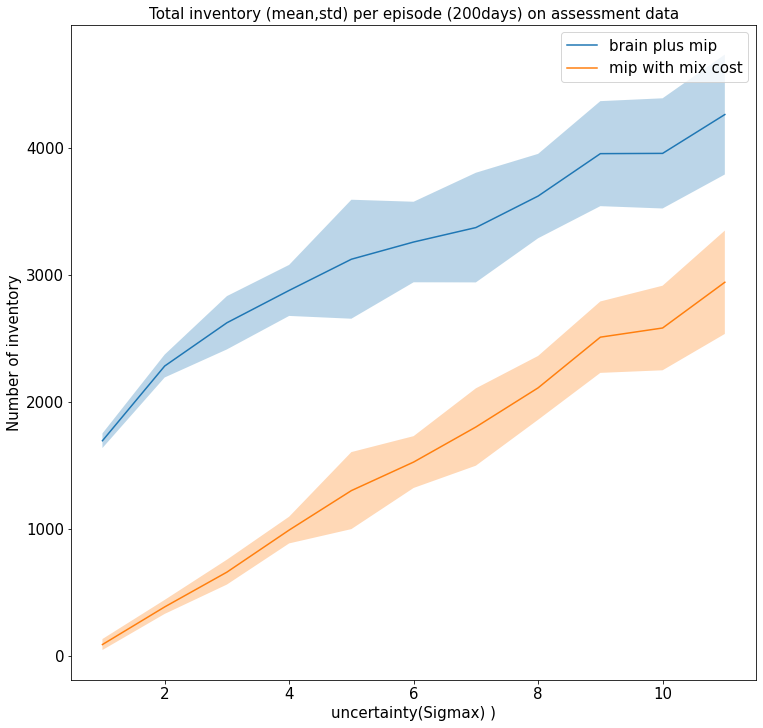

In [26]:
plt.rc('font', size=15)
fig = plt.figure(constrained_layout=True, figsize=(20, 10))
gs = fig.add_gridspec(2, 4)
ax0 = fig.add_subplot(gs[:, :-2])
mean_inv= df_brain.invs_mean_annual
std_inv = df_brain.invs_std_annual
sigmax = df_brain["sigmax"]
#np.arange(len(mean_cost))
ax0.fill_between(sigmax.tolist(), 
                 mean_inv - std_inv, 
                 mean_inv + std_inv, 
                alpha=0.3)
ax0.plot(sigmax.tolist(), mean_inv, label='brain plus mip')
ax0.set_ylabel('Number of inventory',fontsize=15)
ax0.set_xlabel('uncertainty(Sigmax) )', fontsize=15)
ax0.set_title('Total inventory (mean,std) per episode (200days) on assessment data', fontsize=15)
ax0.legend()


mean_inv = df_mipmix.invs_mean_annual
std_inv = df_mipmix.invs_std_annual
sigmax = df_mipmix["sigmax"]
ax0.fill_between(sigmax.tolist(), 
                 mean_inv - std_inv, 
                 mean_inv + std_inv, 
                alpha=0.3)
ax0.plot(sigmax.tolist(), mean_inv, label='mip with mix cost')
ax0.legend()

# mean_inv = df_mip.invs_mean_annual
# std_inv = df_mip.invs_std_annual
# sigmax = df_mip["sigmax"]
# ax0.fill_between(sigmax.tolist(), 
#                  mean_inv - std_inv, 
#                  mean_inv + std_inv, 
#                  label='Standard Deviation mip with inv cost', alpha=0.3)
# ax0.plot(sigmax.tolist(), mean_inv, label='Mean missed mip with inv cost')
# ax0.legend()

SECTION 2: detailed policy analysis

In [ ]:
Section 2.1: correlation analaysis 
Section 2.2: brain export analysis  

In [29]:
import os
os.listdir()

['.ipynb_checkpoints',
 '2022-03-31-14-28-28_safety_policy_log_sigmax0.csv',
 '2022-03-31-14-47-39_safety_policy_log_sigmax8.csv',
 '2022-03-31-15-11-21_safety_policy_log_sigmax8_mip_plus_heurisitcs.csv',
 '2022-04-01-09-55-21_safety_policy_log_mip_only_sigmax5.csv',
 '2022-04-01-15-28-04_exported_log_ims_safety_mip_mbr_v23_sigma5.csv',
 '2022-04-02-11-16-32_exported_log_ims_mbr_RLonly_v5_sigmax5.csv',
 '2022-04-03-17-00-07_quasi_static_dfo_policy_log.csv',
 '2022-04-03-17-02-10_quasi_static_dfo_policy_log.csv',
 '2022-04-03-17-03-43_quasi_static_dfo_policy_log_update10d.csv',
 '2022-04-11-09-40-23_exported_log_ims_safety_mip_mbr38_ratio1.csv',
 '2022-04-11-10-28-43_exported_log_ims_safety_mip_mbr37_ratio3.csv',
 '2022-04-11-11-06-50_exported_log_ims_safety_mbr39_ratio15.csv',
 '2022-04-11-12-23-11_exported_log_ims_safety_mbr40_ratio10.csv',
 '2022-04-11-12-59-45_exported_log_ims_safety_mbr41_ratio7.csv',
 '2022-04-11-17-31-21_safety_policy_log_mixed_cost_ratio1.csv',
 '2022-04-12-09-1

In [65]:
df = pd.read_csv('2022-05-04-15-39-59_exported_log_r100freq10.csv')

In [66]:
df.inventory = df.inventory.apply(literal_eval)
df.lost_sales = df.lost_sales.apply(literal_eval)
df.demand_sigma = df.demand_sigma.apply(literal_eval)
loss_mean = np.mean(df["lost_sales"].values.tolist())
loss_std = np.std(df["lost_sales"].values.tolist())
inv_mean = np.mean(df["inventory"].values.tolist())
inv_std = np.std(df["inventory"].values.tolist())
df[["inv0", "inv1", "inv2", "inv3"]] =df["inventory"].apply(pd.Series)
df['invs'] = df["inventory"].apply(lambda x: sum(x))
df[["ls0", "ls1", "ls2", "ls3"]] = df["lost_sales"].apply(pd.Series)
df['lss'] = df["lost_sales"].apply(lambda x: sum(x))

In [76]:
df[["sig0", "sig1", "sig2", "sig3", "sig4", "sig5", "sig6", "sig7", "sig8", "sig9",\
   "sig10", "sig11", "sig12", "sig13", "sig14", "sig15", "sig16", "sig17", "sig18", "sig19",\
   "sig20", "sig21", "sig22", "sig23", "sig24", "sig25", "sig26", "sig27", "sig28", "sig29"]] = df['demand_sigma'].apply(pd.Series)


In [105]:
df.demand_forecast = df.demand_forecast.apply(literal_eval)

In [108]:
df[["d0", "d1", "d2", "d3", "d4", "d5", "d6", "d7", "d8", "d9",\
   "d10", "d11", "d12", "d13", "d14", "d15", "d16", "d17", "d18", "d19",\
   "d20", "d21", "d22", "d23", "d24", "d25", "d26", "d27", "d28", "d29"]] = df['demand_forecast'].apply(pd.Series)


In [117]:
df["state_list"] = df["state_list"].apply(literal_eval)

In [121]:
len(df["state_list"][0])

48

In [122]:
df[["st0", "st1", "st2", "st3", "st4", "st5", "st6", "st7", "st8", "st9",\
   "st10", "st11", "st12", "st13", "st14", "st15", "st16", "st17", "st18", "st19",\
   "st20", "st21", "st22", "st23", "st24", "st25", "st26", "st27", "st28", "st29",
   "st30", "st31", "st32", "st33", "st34", "st35", "st36", "st37", "st38", "st39",
   "st40", "st41","st42","st43", "st44", "st45", "st46", "st47"]] = df['state_list'].apply(pd.Series)


In [77]:
df['safety_stock_stage0'].corr(df["sig0"])

0.5589732030452087

In [196]:
corr = []
for i in range(0,10):
    this_corr = df['safety_stock_stage0'].corr(df["sig"+str(i)])
    corr.append(this_corr)
    print("corr with sig", i, this_corr)

corr with sig 0 0.5589732030452087
corr with sig 1 0.5547972165631156
corr with sig 2 0.5582943447977744
corr with sig 3 0.5444003633480132
corr with sig 4 0.604704517943687
corr with sig 5 0.5233097474649961
corr with sig 6 0.5330940068470831
corr with sig 7 0.3932043656321017
corr with sig 8 0.5478994908746043
corr with sig 9 0.4944919595187693


In [197]:
corr1 = []
for i in range(0,10):
    this_corr = df['safety_stock_stage1'].corr(df["sig"+str(i)])
    corr1.append(this_corr)
    print("corr with sig", i, this_corr)

corr with sig 0 0.40550582572132776
corr with sig 1 0.41548333061403553
corr with sig 2 0.2620466306387617
corr with sig 3 0.23686900837432492
corr with sig 4 0.2076437967092993
corr with sig 5 0.47252373956195903
corr with sig 6 0.35409093404359054
corr with sig 7 0.6271014345353658
corr with sig 8 0.430832951653275
corr with sig 9 0.3689380869765643


In [198]:
corr2 = []
for i in range(0,10):
    this_corr = df['safety_stock_stage2'].corr(df["sig"+str(i)])
    corr2.append(this_corr)
    print("corr with sig", i, this_corr)

corr with sig 0 0.035847417667897265
corr with sig 1 -0.09397667746898336
corr with sig 2 0.3303352408972411
corr with sig 3 -0.018988960996943662
corr with sig 4 -0.04460487311638881
corr with sig 5 -0.2257879351066837
corr with sig 6 -0.13061778212330813
corr with sig 7 -0.2701066318477376
corr with sig 8 0.30997981125371266
corr with sig 9 -0.01918664544242109


In [199]:
corrd = []
for i in range(0,10):
    this_corr = df['safety_stock_stage0'].corr(df["d"+str(i)])
    corrd.append(this_corr)
    print("corr with d", i, this_corr)

corr with d 0 0.05625644130835431
corr with d 1 0.05420315501659679
corr with d 2 0.051857772256284886
corr with d 3 0.04984466405551976
corr with d 4 0.04735331223919217
corr with d 5 0.04517853858593774
corr with d 6 0.04320871355260397
corr with d 7 0.04098374582253097
corr with d 8 0.038870050438462485
corr with d 9 0.037011195775624735


In [200]:
corrd1 = []
for i in range(0,10):
    this_corr = df['safety_stock_stage1'].corr(df["d"+str(i)])
    corrd1.append(this_corr)
    print("corr with d", i, this_corr)

corr with d 0 -0.10653040029893278
corr with d 1 -0.10823706264256172
corr with d 2 -0.109902801094032
corr with d 3 -0.11079428769718354
corr with d 4 -0.11163918551994818
corr with d 5 -0.11194781444372721
corr with d 6 -0.11243096815371857
corr with d 7 -0.1131703280376861
corr with d 8 -0.11395682233469877
corr with d 9 -0.11422282551258174


In [201]:
corrd2 = []
for i in range(0,10):
    this_corr = df['safety_stock_stage2'].corr(df["d"+str(i)])
    corrd2.append(this_corr)
    print("corr with d", i, this_corr)

corr with d 0 0.14423098622184463
corr with d 1 0.1423710560662237
corr with d 2 0.13993085511326914
corr with d 3 0.137800812478578
corr with d 4 0.13542495073368405
corr with d 5 0.13293485509886774
corr with d 6 0.13106828399339904
corr with d 7 0.1280680474587187
corr with d 8 0.1254730876721
corr with d 9 0.12323689932461074


In [202]:
corrst = []
for i in range(0,33):
    this_corr = df['safety_stock_stage0'].corr(df["st"+str(i)])
    corrst.append(this_corr)
    print("corr with st", i, this_corr)

corr with st 0 0.3016380529762291
corr with st 1 0.16948390913408878
corr with st 2 0.11078797327962983
corr with st 3 0.027542843424290916
corr with st 4 0.023143258644158855
corr with st 5 0.012821355289052481
corr with st 6 0.02697405167535351
corr with st 7 0.022040990013846195
corr with st 8 0.01164656726035397
corr with st 9 0.02832838249641487
corr with st 10 0.02387960291908108
corr with st 11 0.012564688527350105
corr with st 12 0.0303188501147965
corr with st 13 0.024529239563288674
corr with st 14 0.012955528039873172
corr with st 15 0.03147182488536397
corr with st 16 0.025413495544071248
corr with st 17 0.014001495663893969
corr with st 18 0.029054702839223435
corr with st 19 0.02264556470336318
corr with st 20 0.011752779389591383
corr with st 21 0.029723885832151756
corr with st 22 0.024251973839813097
corr with st 23 0.012041020378393998
corr with st 24 0.03033121055914757
corr with st 25 0.02421436735262143
corr with st 26 0.011325070390196427
corr with st 27 0.0296905

In [203]:
corrst1 = []
for i in range(0,33):
    this_corr = df['safety_stock_stage1'].corr(df["st"+str(i)])
    corrst1.append(this_corr)
    print("corr with st", i, this_corr)

corr with st 0 0.23604355396042803
corr with st 1 0.1465884923010494
corr with st 2 0.07857280493473351
corr with st 3 -0.047839181473616356
corr with st 4 -0.054420490090537975
corr with st 5 -0.06456382836515726
corr with st 6 -0.05151403340973933
corr with st 7 -0.057135874401539506
corr with st 8 -0.06822443245168791
corr with st 9 -0.055767306819009044
corr with st 10 -0.06158490467246705
corr with st 11 -0.07269734676777091
corr with st 12 -0.056820237397058465
corr with st 13 -0.06176535132195627
corr with st 14 -0.07345463123464815
corr with st 15 -0.05953615217870011
corr with st 16 -0.06551191648708252
corr with st 17 -0.07655581174582714
corr with st 18 -0.0679972921371062
corr with st 19 -0.07272942195158298
corr with st 20 -0.08222907363396954
corr with st 21 -0.07148398084709347
corr with st 22 -0.07595788239861886
corr with st 23 -0.08753252085474583
corr with st 24 -0.07466173386393886
corr with st 25 -0.07941380539033681
corr with st 26 -0.09097209259777225
corr with s

In [204]:
corrst2 = []
for i in range(0,33):
    this_corr = df['safety_stock_stage2'].corr(df["st"+str(i)])
    corrst2.append(this_corr)
    print("corr with st", i, this_corr)

corr with st 0 -0.002731716335798929
corr with st 1 -0.013410814195135174
corr with st 2 -0.0033616752370163993
corr with st 3 0.08102701308019022
corr with st 4 0.08310404026409758
corr with st 5 0.0821057995454241
corr with st 6 0.0809235641753261
corr with st 7 0.08173860670171662
corr with st 8 0.0820542248975441
corr with st 9 0.08411716763382107
corr with st 10 0.08452895464577805
corr with st 11 0.08430743324194821
corr with st 12 0.08990848089809307
corr with st 13 0.08897193314037811
corr with st 14 0.08841047643757281
corr with st 15 0.08916171622556002
corr with st 16 0.09015659768512568
corr with st 17 0.08946148588928435
corr with st 18 0.09164821794018484
corr with st 19 0.09243967539188984
corr with st 20 0.09113116600809575
corr with st 21 0.09804859157016824
corr with st 22 0.09929186829838337
corr with st 23 0.09659575889828147
corr with st 24 0.09835188345040055
corr with st 25 0.0979446041417345
corr with st 26 0.0951025287654009
corr with st 27 0.09675977913416514


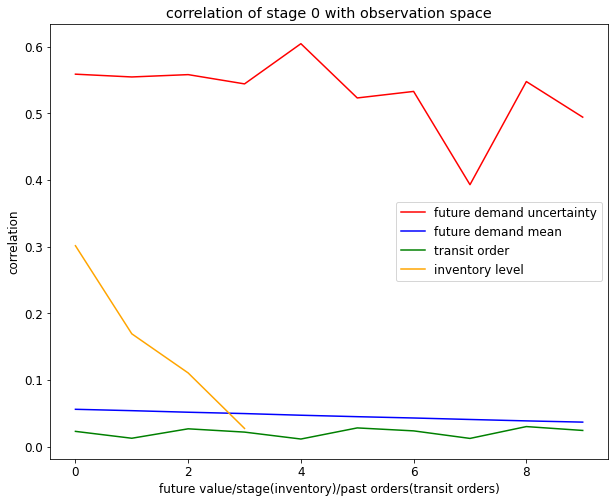

In [205]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(corr, label="future demand uncertainty", c="Red")
ax.plot(corrd, label="future demand mean", c="Blue")
ax.plot(corrst[4:14], label= "transit order", c = "Green")
ax.plot(corrst[0:4], label= "inventory level", c = "Orange")
ax.set_title('correlation of stage 0 with observation space')
ax.set_xlabel('future value/stage(inventory)/past orders(transit orders)')
ax.set_ylabel('correlation')
plt.legend()
plt.show()



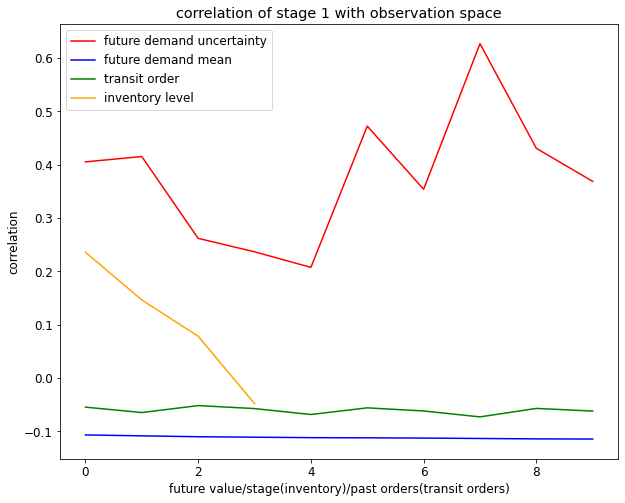

In [208]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(corr1, label="future demand uncertainty", c="Red")
ax.plot(corrd1, label="future demand mean", c="Blue")
ax.plot(corrst1[4:14], label= "transit order", c = "Green")
ax.plot(corrst1[0:4], label= "inventory level", c = "Orange")
ax.set_title('correlation of stage 1 with observation space')
ax.set_xlabel('future value/stage(inventory)/past orders(transit orders)')
ax.set_ylabel('correlation')
plt.legend()
plt.show()

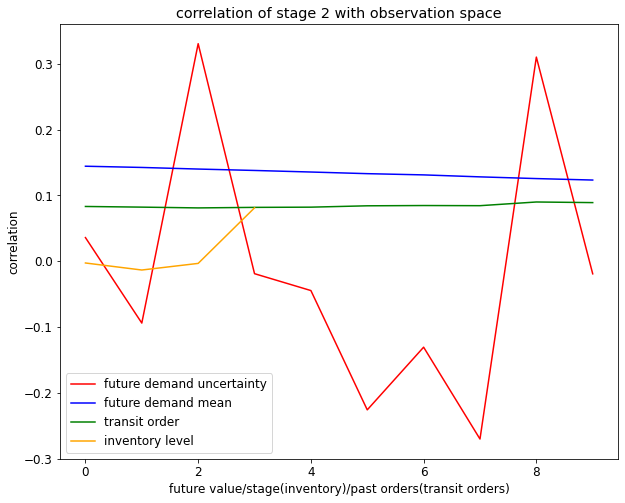

In [209]:
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(corr2, label="future demand uncertainty", c="Red")
ax.plot(corrd2, label="future demand mean", c="Blue")
ax.plot(corrst2[4:14], label= "transit order", c = "Green")
ax.plot(corrst2[0:4], label= "inventory level", c = "Orange")
ax.set_title('correlation of stage 2 with observation space')
ax.set_xlabel('future value/stage(inventory)/past orders(transit orders)')
ax.set_ylabel('correlation')
plt.legend()
plt.show()

In [54]:
df.columns

Index(['state_list', 'sim_reward', 'sim_terminal', 'episode_demand_profile',
       'demand_list', 'demand_actual', 'demand_forecast', 'demand_sigma',
       'inventory', 'units_sold', 'units_replenished', 'lost_sales',
       'previous_order_levels', 'brain_action_previous',
       'contraint_relaxation_flag', 'anticipated_missed_sale_L0',
       'anticipated_missed_sale_L1', 'anticipated_missed_sale_L2',
       'anticipated_inventory_L0', 'anticipated_inventory_L1',
       'anticipated_inventory_L2', 'self.iter_count', 'sum_cost_action_freq',
       'missed2holding_cost_ratio', 'self.sigmax',
       'demand_distribution_profile', 'sigmax', 'offset', 'amp1', 'ph1',
       'amp2', 'ph2', 'randvar', 'initial_inventory_low',
       'initial_inventory_high', 'initial_inventory', 'lead_profile', 'solver',
       'filter_alpha', 'missed_sale_to_inventory_cost_ratio',
       'action_frequency', 'episode', 'iteration', 'TimeStamp',
       'safety_stock_stage0', 'safety_stock_stage1', 'safety_

In [34]:
df.columns

Index(['state_list', 'sim_reward', 'sim_terminal', 'episode_demand_profile',
       'demand_list', 'demand_actual', 'demand_forecast', 'demand_sigma',
       'inventory', 'units_sold', 'units_replenished', 'lost_sales',
       'previous_order_levels', 'brain_action_previous',
       'contraint_relaxation_flag', 'anticipated_missed_sale_L0',
       'anticipated_missed_sale_L1', 'anticipated_missed_sale_L2',
       'anticipated_inventory_L0', 'anticipated_inventory_L1',
       'anticipated_inventory_L2', 'self.iter_count', 'sum_cost_action_freq',
       'missed2holding_cost_ratio', 'self.sigmax',
       'demand_distribution_profile', 'sigmax', 'offset', 'amp1', 'ph1',
       'amp2', 'ph2', 'randvar', 'initial_inventory_low',
       'initial_inventory_high', 'initial_inventory', 'lead_profile', 'solver',
       'filter_alpha', 'missed_sale_to_inventory_cost_ratio',
       'action_frequency', 'episode', 'iteration', 'TimeStamp',
       'safety_stock_stage0', 'safety_stock_stage1', 'safety_

In [46]:
df.demand_sigma[0]

'[5.0, 5.0, 1.0, 4.0, 2.0, 2.0, 0.0, 1.0, 5.0, 0.0, 4.0, 0.0, 3.0, 2.0, 5.0, 5.0, 0.0, 0.0, 5.0, 1.0, 1.0, 0.0, 3.0, 0.0, 3.0, 0.0, 4.0, 4.0, 0.0, 1.0]'

In [ ]:
# list files used for comparison 
# make sure the order is :
# (1) brain_only
# (2) mip_only  
# (3) mip + brain 
# (4) mip + heuristics 
# (5) quasi static optimizer 
filelist = [
    '2022-04-02-11-16-32_exported_log_ims_mbr_RLonly_v5_sigmax5.csv',
    '2022-04-03-17-03-43_quasi_static_dfo_policy_log_update10d.csv',
    '2022-04-01-09-55-21_safety_policy_log_mip_only_sigmax5.csv',
    '2022-04-01-15-28-04_exported_log_ims_safety_mip_mbr_v23_sigma5.csv', 
    '2022-03-31-15-11-21_safety_policy_log_sigmax8_mip_plus_heurisitcs.csv'
    
]
filename = ["brain", "quasi-static optimizer", "mip only", "brain plus mip", "heuristics plus mip"]

In [4]:
results = []
for file, name in zip(filelist, filename):
    results.append(analyse_logs(filename = file, filter_transient_ndays = 20 ))
print(results)

[(320.2916666666667, 94.560755468083, 1752.2083333333333, 688.9150042433052, 65.56583333333333, 10.505819296584903), (732.8478260869565, 356.95053920622325, 1596.7608695652175, 1287.932092495263, 125.89478260869565, 43.57642133790197), (132.078125, 21.191720970662406, 327.46875, 63.49102392502124, 23.086406249999996, 3.067405898059856), (48.89795918367347, 16.76460171755653, 750.0816326530612, 112.86290295728521, 14.83551020408162, 2.7714610025102946), (155.41666666666666, 36.84387350011876, 763.875, 114.44661276732066, 30.951249999999987, 6.166841424276607)]


In [5]:
table = zip(filename, [results[i][0] for i in range(0, 4)], [results[i][1] for i in range(0, 4)],
            [results[i][2] for i in range(0, 4)],[results[i][3] for i in range(0, 4)],[results[i][4] for i in range(0, 4)],[results[i][5] for i in range(0, 4)])
print(tabulate(table, headers=['Policy', 'mean-msd(200d)',
                               'std-msd(200d)', 'mean-inv', 'std-inv', 'mean-loss($)', 'std-loss($)'], floatfmt=".1f"))

Policy                    mean-msd(200d)    std-msd(200d)    mean-inv    std-inv    mean-loss($)    std-loss($)
----------------------  ----------------  ---------------  ----------  ---------  --------------  -------------
brain                              320.3             94.6      1752.2      688.9            65.6           10.5
quasi-static optimizer             732.8            357.0      1596.8     1287.9           125.9           43.6
mip only                           132.1             21.2       327.5       63.5            23.1            3.1
brain plus mip                      48.9             16.8       750.1      112.9            14.8            2.8


In [ ]:
input: variable ratio




In [197]:
# reward shaping 

cost = [-1.5 + x/100 for x in range(0,100)]
print(cost)

[-1.5, -1.49, -1.48, -1.47, -1.46, -1.45, -1.44, -1.43, -1.42, -1.41, -1.4, -1.39, -1.38, -1.37, -1.3599999999999999, -1.35, -1.34, -1.33, -1.32, -1.31, -1.3, -1.29, -1.28, -1.27, -1.26, -1.25, -1.24, -1.23, -1.22, -1.21, -1.2, -1.19, -1.18, -1.17, -1.16, -1.15, -1.1400000000000001, -1.13, -1.12, -1.1099999999999999, -1.1, -1.09, -1.08, -1.07, -1.06, -1.05, -1.04, -1.03, -1.02, -1.01, -1.0, -0.99, -0.98, -0.97, -0.96, -0.95, -0.94, -0.93, -0.92, -0.91, -0.9, -0.89, -0.88, -0.87, -0.86, -0.85, -0.84, -0.83, -0.82, -0.81, -0.8, -0.79, -0.78, -0.77, -0.76, -0.75, -0.74, -0.73, -0.72, -0.71, -0.7, -0.69, -0.68, -0.67, -0.66, -0.65, -0.64, -0.63, -0.62, -0.61, -0.6, -0.59, -0.58, -0.57, -0.56, -0.55, -0.54, -0.53, -0.52, -0.51]


In [253]:
ex_cost = -1.85 + np.exp((2*np.array(cost)+2))
 -1.85 + Math.E **((2*((reward/100)+2)))

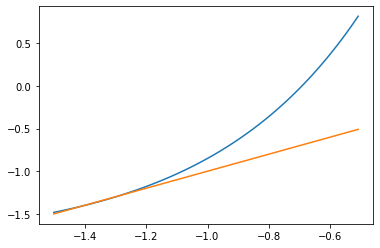

In [254]:
plt.plot(cost, ex_cost)
plt.plot(cost, cost)
plt.show()

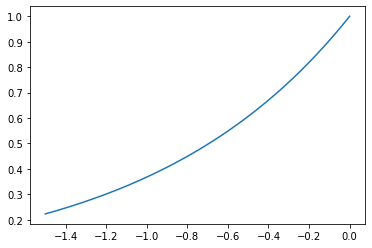

In [120]:
plt.plot(cost, ex_cost)
plt.show()

<AxesSubplot:>

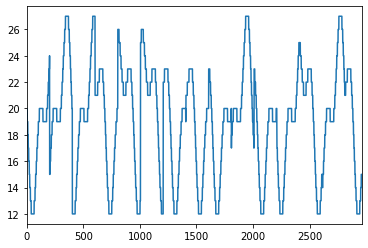

In [9]:
df['demand_actual'].plot()

In [19]:
inv = df["inventory"].values.tolist()

In [20]:
len(inv)

2963

In [31]:
df["inventory"][30]

'[0.0, 0.0, 0.0, 0.0]'

In [34]:
df.inventory = df.inventory.apply(literal_eval)

In [35]:
df["inventory"][30]

[0.0, 0.0, 0.0, 0.0]

In [36]:
inv = df["inventory"].values.tolist()

In [39]:
np.mean(inv)

0.22688153898076274

In [40]:
np.std(inv)

1.6258364638015483

In [41]:
df.columns

Index(['state_list', 'sim_reward', 'sim_terminal', 'episode_demand_profile',
       'demand_list', 'demand_actual', 'demand_forecast', 'demand_sigma',
       'inventory', 'units_sold', 'units_replenished', 'lost_sales',
       'previous_order_levels', 'brain_action_previous',
       'contraint_relaxation_flag', 'anticipated_missed_sale_L0',
       'anticipated_missed_sale_L1', 'anticipated_missed_sale_L2',
       'anticipated_inventory_L0', 'anticipated_inventory_L1',
       'anticipated_inventory_L2', 'reward_pnl', 'episode', 'iteration',
       'TimeStamp', 'safety_stock_stage0', 'safety_stock_stage1',
       'safety_stock_stage2'],
      dtype='object')

In [45]:
df.lost_sales = df.lost_sales.apply(literal_eval)

In [46]:
np.mean(df["lost_sales"].values.tolist())

0.34610192372595344

In [47]:
np.std(df["lost_sales"].values.tolist())

2.557477800959892

In [7]:
df_sigmax8 = pd.read_csv('2022-03-31-14-47-39_safety_policy_log_sigmax8.csv')
df_sigmax8.inventory = df_sigmax8.inventory.apply(literal_eval)
df_sigmax8.lost_sales = df_sigmax8.lost_sales.apply(literal_eval)

In [8]:
df_sigmax8_f = df_sigmax8[df_sigmax8["iteration"]>20]
df_sigmax8_f.head(200)


,state_list,sim_reward,sim_terminal,episode_demand_profile,demand_list,demand_actual,demand_forecast,demand_sigma,inventory,units_sold,...,anticipated_inventory_L0,anticipated_inventory_L1,anticipated_inventory_L2,reward_pnl,episode,iteration,TimeStamp,safety_stock_stage0,safety_stock_stage1,safety_stock_stage2
20,"[7.0, 7.0, 7.0, 14.0, 15.0, 15.0, 14.0, 15.0, ...",13.678950,False,5,"[13.0, 15.0, 14.0, 27.0, 19.0, 15.0, 17.0, 16....",16.0,"[17.0, 17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18....","[7.0, 1.0, 2.0, 0.0, 6.0, 7.0, 3.0, 6.0, 7.0, ...","[7.0, 7.0, 7.0, 0.0]","[16.0, 10.0, 10.0, 11.0]",...,"[7.0, 7.0, 0.0, 0.0, 0.0]","[7.0, 7.0, 7.0, 0.0, 0.0]","[7.0, 7.0, 7.0, 7.0, 0.0]",0.1615,1,21,2022-03-31-14-47-59,2.0,2.0,3.0
21,"[8.0, 7.0, 7.0, 14.0, 15.0, 16.0, 15.0, 15.0, ...",11.283733,False,5,"[13.0, 15.0, 14.0, 27.0, 19.0, 15.0, 17.0, 16....",20.0,"[17.0, 17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18....","[1.0, 2.0, 0.0, 6.0, 7.0, 3.0, 6.0, 7.0, 5.0, ...","[8.0, 7.0, 7.0, 0.0]","[16.0, 17.0, 17.0, 18.0]",...,"[7.0, 0.0, 0.0, 0.0, 0.0]","[7.0, 7.0, 0.0, 0.0, 0.0]","[7.0, 7.0, 7.0, 0.0, 0.0]",0.2300,1,22,2022-03-31-14-48-00,2.0,3.0,3.0
22,"[0.0, 8.0, 8.0, 15.0, 15.0, 16.0, 15.0, 15.0, ...",13.767241,False,5,"[13.0, 15.0, 14.0, 27.0, 19.0, 15.0, 17.0, 16....",16.0,"[17.0, 17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18....","[2.0, 0.0, 6.0, 7.0, 3.0, 6.0, 7.0, 5.0, 1.0, ...","[0.0, 8.0, 8.0, 0.0]","[18.0, 16.0, 17.0, 17.0]",...,"[1.0, 1.0, 0.0, 0.0, 0.0]","[8.0, 1.0, 1.0, 0.0, 0.0]","[8.0, 8.0, 1.0, 1.0, 0.0]",0.2410,1,23,2022-03-31-14-48-01,3.0,3.0,3.0
23,"[1.0, 1.0, 8.0, 15.0, 15.0, 16.0, 15.0, 15.0, ...",11.435514,False,5,"[13.0, 15.0, 14.0, 27.0, 19.0, 15.0, 17.0, 16....",16.0,"[17.0, 17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18....","[0.0, 6.0, 7.0, 3.0, 6.0, 7.0, 5.0, 1.0, 1.0, ...","[1.0, 1.0, 8.0, 0.0]","[16.0, 17.0, 18.0, 18.0]",...,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 0.0, 0.0, 0.0]","[8.0, 1.0, 1.0, 0.0, 0.0]",0.2485,1,24,2022-03-31-14-48-02,3.0,3.0,2.0
24,"[1.0, 1.0, 1.0, 15.0, 15.0, 16.0, 14.0, 15.0, ...",11.266156,False,5,"[13.0, 15.0, 14.0, 27.0, 19.0, 15.0, 17.0, 16....",17.0,"[17.0, 17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18....","[6.0, 7.0, 3.0, 6.0, 7.0, 5.0, 1.0, 1.0, 7.0, ...","[1.0, 1.0, 1.0, 0.0]","[16.0, 17.0, 18.0, 18.0]",...,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 0.0, 0.0, 0.0]",0.2520,1,25,2022-03-31-14-48-03,3.0,3.0,3.0
25,"[1.0, 1.0, 2.0, 14.0, 15.0, 15.0, 14.0, 15.0, ...",11.866935,False,5,"[13.0, 15.0, 14.0, 27.0, 19.0, 15.0, 17.0, 16....",21.0,"[17.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18....","[7.0, 3.0, 6.0, 7.0, 5.0, 1.0, 1.0, 7.0, 6.0, ...","[1.0, 1.0, 2.0, 0.0]","[17.0, 17.0, 17.0, 18.0]",...,"[1.0, 1.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 0.0, 0.0]","[2.0, 1.0, 1.0, 1.0, 0.0]",0.2540,1,26,2022-03-31-14-48-03,3.0,3.0,3.0
26,"[0.0, 1.0, 1.0, 14.0, 15.0, 16.0, 11.0, 12.0, ...",12.164691,False,5,"[13.0, 15.0, 14.0, 27.0, 19.0, 15.0, 17.0, 16....",29.0,"[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19....","[3.0, 6.0, 7.0, 5.0, 1.0, 1.0, 7.0, 6.0, 4.0, ...","[0.0, 1.0, 1.0, 0.0]","[18.0, 18.0, 18.0, 19.0]",...,"[1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 1.0, 0.0, 0.0]",0.2680,1,27,2022-03-31-14-48-03,3.0,2.0,3.0
27,"[0.0, 1.0, 1.0, 11.0, 12.0, 13.0, 16.0, 16.0, ...",10.486150,False,5,"[13.0, 15.0, 14.0, 27.0, 19.0, 15.0, 17.0, 16....",16.0,"[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19....","[6.0, 7.0, 5.0, 1.0, 1.0, 7.0, 6.0, 4.0, 0.0, ...","[0.0, 1.0, 1.0, 0.0]","[17.0, 18.0, 18.0, 19.0]",...,"[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 1.0, 0.0, 0.0, 0.0]",0.2540,1,28,2022-03-31-14-48-04,3.0,2.0,2.0
28,"[2.0, 0.0, 1.0, 16.0, 16.0, 17.0, 15.0, 15.0, ...",9.732189,False,5,"[13.0, 15.0, 14.0, 27.0, 19.0, 15.0, 17.0, 16....",21.0,"[18.0, 18.0, 18.0, 18.0, 18.0, 19.0, 19.0, 19....","[7.0, 5.0, 1.0, 1.0, 7.0, 6.0, 4.0, 0.0, 5.0, ...","[2.0, 0.0, 1.0, 0.0]","[16.0, 18.0, 18.0, 19.0]",...,"[-0.0, 0.0, 0.0, 0.0, 0.0]","[0.0, 0.0, 0.0, 0.0, 0.0]","[1.0, 0.0, 0.0

In [38]:
df.lost_sales


20       [0.0, 0.0, 0.0, 0.0]
21       [0.0, 0.0, 0.0, 0.0]
22       [2.0, 0.0, 0.0, 0.0]
23       [0.0, 0.0, 0.0, 0.0]
24       [0.0, 0.0, 0.0, 0.0]
25       [0.0, 0.0, 0.0, 0.0]
26       [3.0, 0.0, 0.0, 0.0]
27      [12.0, 0.0, 0.0, 0.0]
28       [0.0, 0.0, 0.0, 0.0]
29       [1.0, 0.0, 0.0, 0.0]
30       [0.0, 0.0, 0.0, 0.0]
31       [1.0, 0.0, 0.0, 0.0]
32       [0.0, 0.0, 0.0, 0.0]
33       [2.0, 0.0, 0.0, 0.0]
34       [5.0, 0.0, 0.0, 0.0]
35       [0.0, 0.0, 0.0, 0.0]
36       [0.0, 0.0, 0.0, 0.0]
37       [0.0, 0.0, 0.0, 0.0]
38       [0.0, 0.0, 0.0, 0.0]
39       [0.0, 0.0, 0.0, 0.0]
40       [0.0, 0.0, 0.0, 0.0]
41       [0.0, 0.0, 0.0, 0.0]
42       [2.0, 0.0, 0.0, 0.0]
43       [0.0, 0.0, 0.0, 0.0]
44       [1.0, 0.0, 0.0, 0.0]
45       [4.0, 0.0, 0.0, 0.0]
46       [2.0, 0.0, 0.0, 0.0]
47       [2.0, 0.0, 0.0, 0.0]
48       [0.0, 0.0, 0.0, 0.0]
49       [0.0, 0.0, 0.0, 0.0]
                ...          
3344     [0.0, 0.0, 0.0, 0.0]
3345     [2.0, 0.0, 0.0, 0.0]
3346     [

In [31]:
df[["a", "b", "c", "d"]] =df["inventory"].apply(pd.Series)

c:\users\hokhadiv\anaconda3\envs\orgym\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [45]:
df.groupby('episode').sum().describe()


,sim_reward,episode_demand_profile,demand_actual,contraint_relaxation_flag,reward_pnl,iteration,safety_stock_stage0,safety_stock_stage1,safety_stock_stage2,a,b,c,d
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.0
mean,479.833360,892.352941,3583.117647,45.823529,48.337765,19635.705882,430.176471,426.647059,417.647059,527.882353,647.529412,853.352941,0.0
std,89.696068,52.145159,447.143836,6.346606,6.721449,1877.225738,28.561852,29.576049,29.323500,71.789521,92.680309,110.498836,0.0
min,317.069808,690.000000,2386.000000,34.000000,31.016500,12351.000000,330.000000,326.000000,323.000000,376.000000,490.000000,654.000000,0.0
25%,444.337503,905.000000,3247.000000,40.000000,42.342500,20091.000000,428.000000,422.000000,408.000000,503.000000,613.000000,816.000000,0.0
50%,498.421940,905.000000,3791.000000,47.000000,50.343500,20091.000000,434.000000,432.000000,421.000000,537.000000,633.000000,843.000000,0.0
75%,516.610118,905.000000,3915.000000,51.000000,53.923500,20091.000000,447.000000,443.000000,434.000000,577.000000,717.000000,954.000000,0.0
max,618.648807,905.000000,4062.000000,56.000000,54.799000,20091.000000,456.000000,461.000000,448.000000,612.000000,817.000000,1023.000000,0.0


In [48]:
df.groupby('episode').sum().a.std()



71.78952078205876

,sim_reward,sim_terminal,episode_demand_profile,demand_actual,contraint_relaxation_flag,reward_pnl,iteration,safety_stock_stage0,safety_stock_stage1,safety_stock_stage2
episode,,,,,,,,,,
1,478.350821,False,905,3935.0,40,54.4405,20091,440.0,438.0,430.0
2,457.855859,False,905,3961.0,53,54.7990,20091,438.0,435.0,423.0
3,393.652394,False,905,3032.0,52,40.7795,20091,419.0,412.0,398.0
4,387.848577,False,905,3657.0,42,50.3435,20091,434.0,423.0,413.0
5,444.775009,False,905,3846.0,39,52.8335,20091,433.0,432.0,421.0
6,529.877068,False,905,3230.0,46,41.8060,20091,456.0,450.0,445.0
7,617.992246,False,905,3682.0,49,49.0175,20091,450.0,443.0,442.0
8,501.559148,False,905,3863.0,37,52.9000,20091,418.0,417.0,401.0
9,603.553585,False,905,3791.0,56,50.2755,20091,428.0,425.0,408.0


In [67]:
np.mean(df_sigmax8_f["lost_sales"].values.tolist())

0.3166611733684904

In [68]:
np.std(df_sigmax8_f["lost_sales"].values.tolist())

1.3956233710539454

In [69]:
df_sigmax8_f["lost_sales"].values.tolist()

[[0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [2.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [3.0, 0.0, 0.0, 0.0],
 [12.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [2.0, 0.0, 0.0, 0.0],
 [5.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [2.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [1.0, 0.0, 0.0, 0.0],
 [4.0, 0.0, 0.0, 0.0],
 [2.0, 0.0, 0.0, 0.0],
 [2.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [3.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [3.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [2.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0, 0.0, 0.0],
 [0.0, 0.0

In [55]:
df_sigmax8_h = pd.read_csv('2022-03-31-15-11-21_safety_policy_log_sigmax8_heurisitcs.csv')
df_sigmax8_h.inventory = df_sigmax8_h.inventory.apply(literal_eval)
df_sigmax8_h.lost_sales = df_sigmax8_h.lost_sales.apply(literal_eval)


In [56]:
np.mean(df_sigmax8_h["lost_sales"].values.tolist())

0.5245139475908707

In [62]:
df_sigmax

NameError: name 'df_sigmax' is not defined

In [60]:
np.histogram(df_sigmax8_h["lost_sales"].values.tolist())

(array([18181,   340,   152,    74,    36,    71,    59,    13,     1,
            1], dtype=int64),
 array([ 0. ,  3.8,  7.6, 11.4, 15.2, 19. , 22.8, 26.6, 30.4, 34.2, 38. ]))

In [57]:
np.std(df_sigmax8_h["lost_sales"].values.tolist())

2.5488737664296877

In [58]:
df_sigmax8_h["lost_sales"]

0                 [0, 0, 0, 0]
1         [0.0, 0.0, 0.0, 0.0]
2       [13.0, 11.0, 0.0, 0.0]
3        [0.0, 13.0, 9.0, 0.0]
4       [23.0, 0.0, 15.0, 0.0]
5        [19.0, 0.0, 0.0, 0.0]
6         [0.0, 9.0, 0.0, 0.0]
7        [3.0, 15.0, 0.0, 0.0]
8        [10.0, 0.0, 0.0, 0.0]
9        [14.0, 0.0, 1.0, 0.0]
10        [0.0, 0.0, 1.0, 0.0]
11        [0.0, 0.0, 0.0, 0.0]
12        [0.0, 0.0, 0.0, 0.0]
13        [0.0, 0.0, 0.0, 0.0]
14        [0.0, 0.0, 0.0, 0.0]
15        [0.0, 0.0, 0.0, 0.0]
16        [7.0, 0.0, 0.0, 0.0]
17        [7.0, 0.0, 0.0, 0.0]
18        [0.0, 0.0, 0.0, 0.0]
19        [0.0, 0.0, 0.0, 0.0]
20        [0.0, 0.0, 0.0, 0.0]
21        [0.0, 0.0, 0.0, 0.0]
22        [0.0, 0.0, 0.0, 0.0]
23        [0.0, 1.0, 0.0, 0.0]
24        [0.0, 0.0, 0.0, 0.0]
25        [0.0, 0.0, 0.0, 0.0]
26        [1.0, 0.0, 0.0, 0.0]
27       [12.0, 0.0, 0.0, 0.0]
28        [0.0, 0.0, 0.0, 0.0]
29        [0.0, 0.0, 0.0, 0.0]
                 ...          
4702      [0.0, 0.0, 0.0, 0.0]
4703    